<a href="https://colab.research.google.com/github/tejasvee98/MA471-Survival-Analysis/blob/main/Survival%20Analysis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Mortality Data to various Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [9]:
#Importing Data
url=''
df = pd.read_csv(url)
age=df['Age']
age=age/100
S=1-df['Mortality rate']

X is the Random Variable for age at death. It's CDF is F,pdf f and Survival Function S(=1-F). (x) symbolizes an individual aged x and T(x) denotes the future lifetime of (x) at age x.<br>The survival function of T(x) is written as - 
$P_x(t)=P(X > x + t | X > x)=\frac{S(x+t)}{S(x)} $<br>
$P_x(t)$ gives the survival probability that (x) survives for more than t years<br>
$Q_x(t)=1-P_x(t)$ gives the distribution function of T(x) and represents the probability that (x) does not survive beyond age t.<br>
The force of mortality is an important and fundamental concept in modelling future lifetime and is defined as <br>
$\mu_x(t)= lim_{dt\to0^{+}}\frac{1}{dt}P[t<T(x)\leq t + dt|T(x)>t]=\frac{f(x+t)}{S(x+t)}$


### We had the mortality rate data through which we found CDF F and Survival Function S data points. We fit the values of S to different distributions to get $P_x(t)$ curve to get survival Function. Then we can answer what's the probability of Prof Arabin surviving three more months, considering he survived till age 60.

In [ ]:
def results(func,popt,cov):
    x=0.60
    t1=0.0025
    print("Probility of surviving the next three months given Surivival till Age 60 =",func(x, *popt,t=t1))
    sigma = np.sqrt(np.diag(cov)) 
    print("standard deviation errors on the parameters")
    print(sigma)

In [ ]:
def fit_curve(age,S,func,initial_values,bounds):
    plt.plot(age, S, 'b-', label='data')
    popt, pcov = curve_fit(func, age, S, p0 = initial_values, bounds=bounds)
    plt.plot(age, func(age, *popt), 'g--')
    return popt,pcov

**Confidence Intervals**

A confidence interval is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter. The interval has an associated confidence level that the true parameter is in the proposed range. The confidence level represents the frequency  of possible confidence intervals that contain the true value of the unknown  parameter. In other words, if confidence intervals are constructed using a given confidence level from an infinite number of independent sample statistics, the proportion of those intervals that contain the true value of the parameter will be equal to the confidence level.

**Parametric Bootstrapping To Compute Confidence Intervals of Fitted Parameters**

$θ$ is the vector of parameters whose values we wish to find along with the confidence intervals. Parametric bootstrapping is used to achieve this. Steps involved in Parametric Bootstrapping:

1. Find $\widehat{θ}$ that estimates $θ$.
2. Bootstrap samples are drawn from F($\widehat{θ}$).
3. For each bootstrap sample $x_{1}^{*}$, . . . , $x_{n}^{*}$
we compute $θ_{temp}$.
4. $θ_{temp}$ is appended to the matrix $\widehat{θ}^{*}$ whose rows store values of parameters derived from each sample.
5. After calculation of $\widehat{θ}^{*}$ is complete, the bootstrap difference $δ^{*}$ = $\widehat{θ}^{*}$ − $\widehat{θ}$ is calculated.
4. The bootstrap principle says that the distribution of $δ^{*}$ approximates the distribution of $δ$ = $\widehat{θ}$ − $θ$. We use the bootstrap differences to make a bootstrap confidence interval for $θ$.

In [ ]:
def getConfidenceIntervals(func, thetaHat, p0Val, boundsVal):
    #Step 1 is already done using curve fit by calling the function "results". 
    #thetaHat value is made available to this function as an argument.
    n = age.size
    numOfSamples=n
    thetaStar = np.zeros(shape=(numOfSamples,thetaHat.size))
    for i in range(numOfSamples):
        #Step 2 involves generating random values for xData to be fed to Curve Fit, 
        #yData is calculated by finding the function value at xData and thetaHat
        #Hence, (xData, yData) are samples drawn from F(thetaHat)
        sample=np.random.randint(0,n-1,n)
        sample=0.14 + 0.01*sample
        #Step 3, thetaTemp is computed using curve fit on (xData, yData) sampled from F(thetaHat)
        thetaTemp, pcov= curve_fit(func, sample, func(sample, *thetaHat), p0 = p0Val, bounds= boundsVal) 
        #Step 4
        thetaStar[ i, :] = thetaTemp
    #Step 5 
    deltaStar = thetaStar - thetaHat 
    #Step 6, Finding 90% confidence intervals for parameters
    q1=np.quantile(deltaStar,0.05,0)
    q2=np.quantile(deltaStar,0.95,0)
    for i in range(thetaHat.size):
        print("[", thetaHat[i]-q2[i], ",", thetaHat[i]-q1[i], "]")

## Exponential Distribution
$X \sim exp(\lambda)$<br>
$P_x(t) \sim e^{-\lambda t}$<br>
$\mu_x(t) \sim \lambda$

Here, the probability of survival is independent of initial age, and only depends on the variable t

In [ ]:
def exp_survival(age,lam,t=0.01):
    return np.exp(-lam*t)

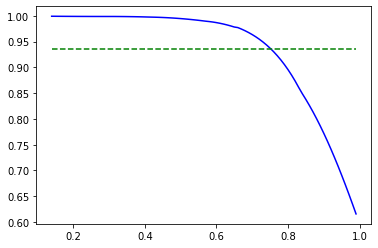

In [ ]:
plt.plot(age, S, 'b-', label='data')
popt, pcov = curve_fit(exp_survival, age, S, p0 = 1, bounds=(0,float("inf")))
plt.plot(age, exp_survival(age, *popt)*np.ones(86), 'g--')

In [ ]:
results(exp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(exp_survival, popt, 1, (0,float("inf")))

Probility of surviving the next three months given Surivival till Age 60 = 0.9833741854698006
standard deviation errors on the parameters
[1.17855203]
Confidence intervals: 


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 6.706236436653995 , 6.706236436653995 ]


## Weibull Distribution 

$\large{X \sim Weibull(\alpha,\lambda)\ (\alpha>0 \ and \ \lambda>0)}$<br>
$\large{P_x(t) \sim \frac{e^{-(\lambda(x+t))^\alpha}}{e^{-(\lambda x)^\alpha}}}$<br>
$\large{\mu_x(t) \sim \alpha \lambda^{\alpha}(x+t)^{\alpha -1}}$




In [ ]:
def weibull_survival(age,alpha,lam,t=0.01):
    return np.exp(-pow((lam*(age+t)),alpha))/np.exp(-pow((lam*(age)),alpha))

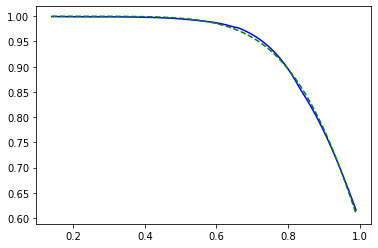

In [ ]:
popt,pcov=fit_curve(age,S,weibull_survival,(1,1),((0,0),(float("inf"),float("inf"))))

In [ ]:
results(weibull_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(weibull_survival, popt, (1,1),((0,0),(float("inf"),float("inf"))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9965424643036773
standard deviation errors on the parameters
[0.04403948 0.00190915]
Confidence intervals: 
[ 8.108163637499246 , 8.108163700340674 ]
[ 1.2561893560310664 , 1.2561893586938178 ]


## Pareto Distribution
$ \large{X \sim Pareto(\theta) \ (\theta > 0)}$<br>
$\large{P_x(t) = \frac{x^{\theta}}{(x+t)^{\theta}}}$<br>
$\large{\mu_x(t) = \frac{\theta}{x+t}}$

In [ ]:
def pareto_survival(age,theta,t=0.01):
    return pow(age,theta)/pow((age+t),theta)

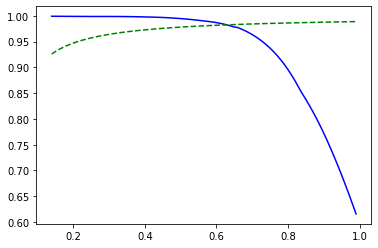

In [ ]:
popt,pcov=fit_curve(age,S,pareto_survival,7,((0),(float("inf"))))

In [ ]:
results(pareto_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(pareto_survival, popt, 7,((0),(float("inf"))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9953752689484279
standard deviation errors on the parameters
[0.49709074]
Confidence intervals: 
[ 1.1148260924463331 , 1.1148260924565783 ]


## Makeham Gompertz
$\large{X \sim Gompertz(\alpha,\beta,\lambda)}$<br>
$\large{S_x(t)=e^{-\alpha t- \beta \lambda^{x} (\frac{\lambda^{t}-1}{\log \lambda}) }}$<br>
$\large{\mu_x(t)=\alpha + \beta \lambda^{x+t}}$

In [ ]:
def make_gomp_survival(x,A,B,lam,t=0.01):
    return np.exp(-(t*A +B*pow(lam,x)*(pow(lam,t)-1)/np.log(lam)))

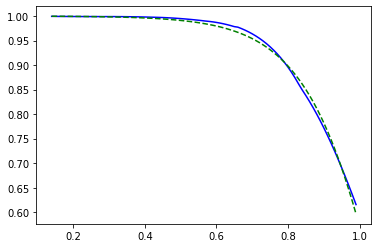

In [ ]:
popt,pcov=fit_curve(age,S,make_gomp_survival,[1,0.5,1],bounds=((0,0,1), (100, 1., 10000)))

In [ ]:
results(make_gomp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(make_gomp_survival, popt, [1,0.5,1],((0,0,1), (100, 1., 10000)))

Probility of surviving the next three months given Surivival till Age 60 = 0.9950095403766779
standard deviation errors on the parameters
[1.09526144e-01 1.67717604e-03 4.86648766e+02]
Confidence intervals: 
[ -6.30504591668043 , -6.242926077583355e-11 ]
[ -0.49893491503985254 , 0.013978432051657472 ]
[ 3850.9443248707857 , 7700.986536847533 ]


## Burr Distribution
$\large{X \sim Burr(\gamma,\theta)}$<br>
$\large{S_x(t)=\frac{(1+x^{\gamma})^{\theta}}{(1+(x+t)^{\gamma})^{\theta}}}$<br>
$\large{\mu_x(t)=\frac{\gamma \theta (1+x^{\gamma})^{\theta}(x+t)^{\gamma -1}}{1+(x+t)^{\gamma}}}$

In [ ]:
def burr_survival(x,gamma,theta,t=0.01):
    return pow(1+pow(x,gamma),theta)/pow(1+pow(x+t,gamma),theta)

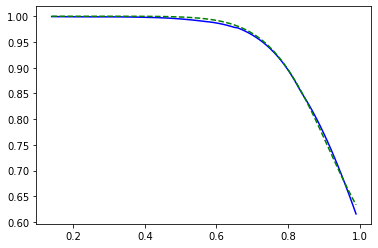

In [ ]:
popt,pcov=fit_curve(age,S,burr_survival,(0.1,0.1),((0,0),(float('inf'),float('inf'))))

In [ ]:
results(burr_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(burr_survival, popt, (0.1,0.1),((0,0),(float('inf'),float('inf'))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9980873726098498
standard deviation errors on the parameters
[0.0671687  0.04372561]
Confidence intervals: 
[ 10.432623560283945 , 10.432623560490365 ]
[ 8.952090086235522 , 8.95209008633137 ]


## Exponentiated exponential
$\large{X \sim Exponentiated \ Exp(\alpha,\lambda);}$<br>
$\large{S_x(t)=\frac{1-(1-e^{-\lambda(x+t)})^{\alpha}}{1-(1-e^{-\lambda x})^{\alpha}}}$<br>
$\large{\mu_x(t)=\frac{\alpha (1-e^{-\lambda(x+t)})^{\alpha-1} \lambda e^{-\lambda(x+t)}}{1-(1-e^{-\lambda(x+t)})^{\alpha}}}$

In [ ]:
def exp_exp_survival(x,alpha,lam,t=0.01):
    return 1-pow(1-np.exp(-lam*(x+t)),alpha)/1-pow(1-np.exp(-lam*(x)),alpha)

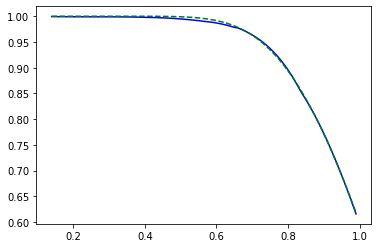

In [ ]:
popt,pcov=fit_curve(age,S,exp_exp_survival,(1,1),((0,0),(float('inf'),float('inf'))))

In [ ]:
results(exp_exp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(exp_exp_survival, popt, (1,1),((0,0),(float('inf'),float('inf'))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9921487880131341
standard deviation errors on the parameters
[0.42521878 0.01565779]
Confidence intervals: 
[ 28.839188168422595 , 28.839188320052646 ]
[ 2.9009277484553135 , 2.900927753708702 ]


We can see that the values of survival for 3 months after the person has survived till age 60 agree for most distributions and is around 0.99. 

We see poor fitting for exponential and pareto distributions and we shall not use them for any future analysis.